<a href="https://colab.research.google.com/github/McyRoyAl/virus_test/blob/main/Learning_and_optimization_phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import BaseEstimator,ClassifierMixin
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.spatial import distance
import matplotlib.pyplot as plt
import math

#kNN implementation
class kNN(BaseEstimator, ClassifierMixin):
  def __init__(self, n_neighbors:int = 5):
    self.n_neighbors = n_neighbors
  def fit(self, X, Y):
    self.X = np.copy(X)
    self.Y = np.copy(Y)
    return self

  def predict(self, X):
    distances = np.array(distance.cdist(X,self.X, 'euclidean'))
    row_sums = np.sum(self.Y[np.argpartition(distances, self.n_neighbors - 1)[:, 0:self.n_neighbors]], axis=1)
    predictions = np.where(row_sums > (self.n_neighbors / 2), 1, 0)
    return predictions

In [ ]:
def visualize_clf(clf, X, Y, title, marker_size=250):
    from matplotlib.colors import ListedColormap

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["P", "v"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())
    plot_step = 0.02

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    clf.fit(X,Y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(range(n_classes), palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()

#Decision boundaries visualization
First case: K = 1
<br>
Second case: k =9

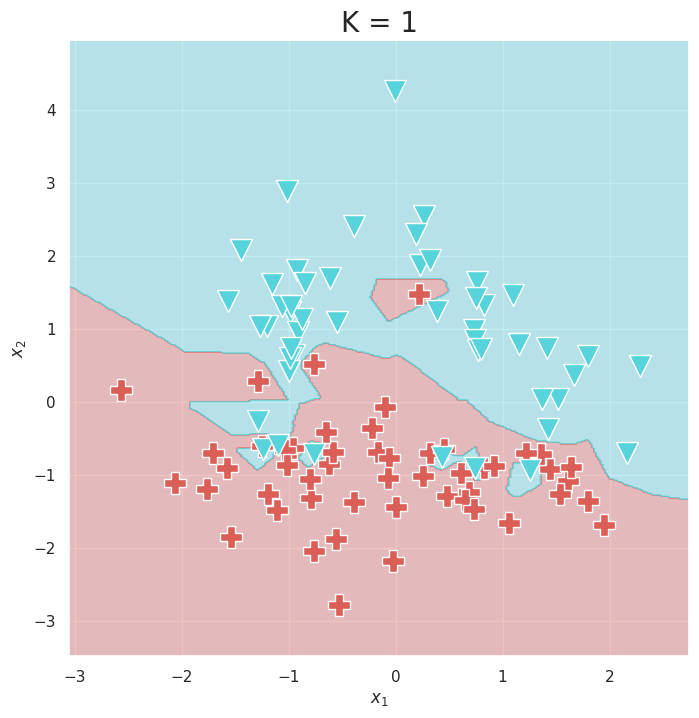

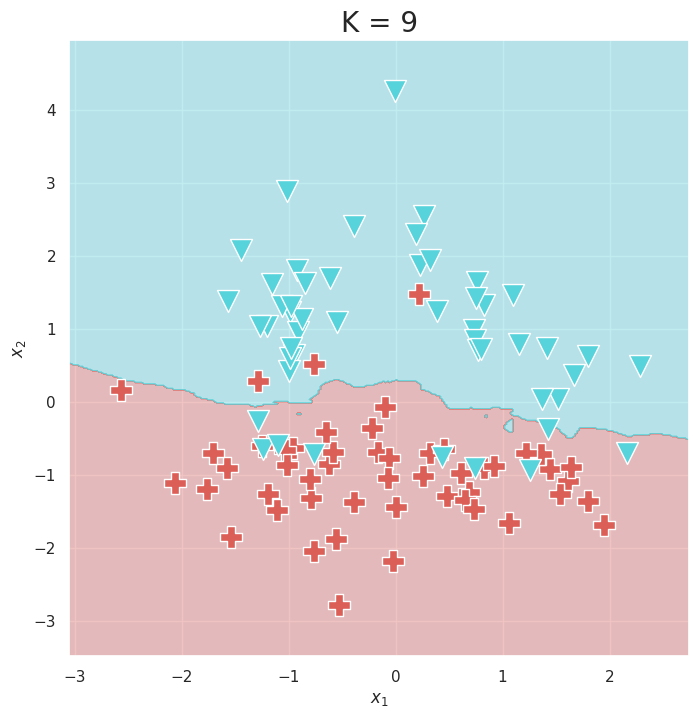

In [ ]:
#KNN decision boundaries visualization
from sklearn.datasets import make_classification
X_toy, y_toy = make_classification(n_samples = 100, n_features = 2,random_state = 10, flip_y = 0.1,n_informative = 2, n_redundant = 0)
k = kNN(1)
visualize_clf(k, X_toy, y_toy, "K = 1", marker_size=250)
k = kNN(9)
visualize_clf(k, X_toy, y_toy, "K = 9", marker_size=250)

In [ ]:
from sklearn.model_selection import train_test_split
#Assume that the data is on the drive
drive.mount('/content/gdrive')

#splitting the data into training and test sets - in this phase we work only with training set
X_train,X_test= train_test_split(pd.read_csv('gdrive/My Drive/virus_data.csv'),test_size=0.2,random_state=10,shuffle=False)
df = preprare_data(X_train, X_train)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Before:  135
After:  0
Before1:  188
After1:  0
Before1:  182
After1:  0
Before:  135
After:  0
Before1:  188
After1:  0
Before1:  182
After1:  0


Observing the 10 most correlated features with spread

In [ ]:
s = df.corr().spread.abs()
print("feature                  corr")
s.sort_values(kind="quicksort", ascending=False).head(11)

feature                  corr


spread                 1.000000
PCR_10                 0.091048
PCR_07                 0.061580
sport_activity         0.042926
household_income       0.038512
O+                     0.035586
PCR_02                 0.033808
PCR_09                 0.029570
A+                     0.028215
shortness_of_breath    0.027484
risk                   0.022330
Name: spread, dtype: float64

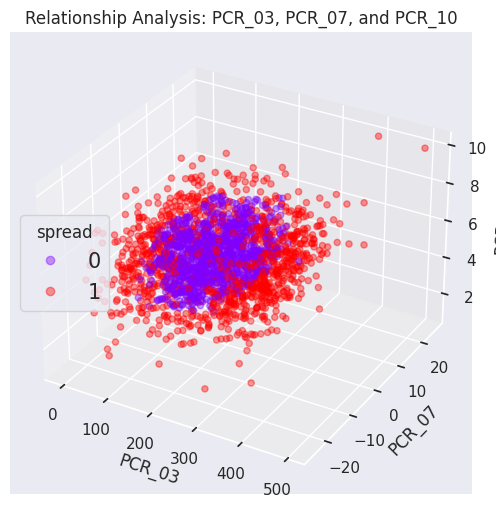

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Confining the values within specified ranges
PCR_03_clipped = np.clip(df["PCR_03"], -300, 500)
PCR_07_clipped = np.clip(df["PCR_07"], -25, 25)
PCR_10_clipped = np.clip(df["PCR_10"], -10, 10)

# Q3
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111, projection="3d")

ax.set_xlabel('PCR_03')
ax.set_ylabel('PCR_07')
ax.set_zlabel('PCR_10')

sc = ax.scatter(PCR_03_clipped, PCR_07_clipped, PCR_10_clipped, alpha=0.4, c=df["spread"], cmap='rainbow', label="spread")
plt.legend(*sc.legend_elements(), title="spread", loc='center left', prop={'size': 15})
plt.title("Relationship Analysis: PCR_03, PCR_07, and PCR_10", fontsize=12)
plt.show()


k-NN Classification with 11 Neighbors: PCR_03, PCR_07, and PCR_10

In [ ]:
X = np.array(df[["PCR_03","PCR_07","PCR_10"]].values.tolist())
Y = np.array(df[["spread"]].values.tolist())
k = kNN(11)
k.fit(X,Y)
res = k.predict(X)
k.score(X,Y)

0.8166666666666667

Feature Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
def minMax(dfTransform):
  normalized_df=(dfTransform-dfTransform.min())/(dfTransform.max()-dfTransform.min())
  return normalized_df#.copy(deep = True)

def zScore(dfTransform,y):
  scaler = StandardScaler()
  return scaler.fit_transform(dfTransform,y)

In [ ]:
#Normalization process
minmax = ["weight","age","sport_activity","num_of_siblings",'PCR_03','PCR_04','PCR_05','PCR_07']
zscore = ["sugar_levels","PCR_01","PCR_02"]
gf = df[["weight","age","sport_activity","num_of_siblings",'PCR_04','PCR_05','PCR_08','PCR_09']]
TL1 = df[["spread","covid","risk"]].copy(deep = True)

df[["weight","age","sport_activity","num_of_siblings",'PCR_04','PCR_05','PCR_08','PCR_09']] = minMax(gf)
y = np.array(TL1.values.tolist())
df[["sugar_levels","PCR_01","PCR_02",'PCR_10','PCR_03','PCR_07']] = zScore(df[["sugar_levels","PCR_01","PCR_02",'PCR_10','PCR_03','PCR_07']],y)

k-NN (11) Classification Post-Normalization

In [ ]:

normalized_df = df[['PCR_10','PCR_03','PCR_07']].copy(deep = True)#(tempdf-tempdf.min())/(tempdf.max()-tempdf.min())
x = np.array(normalized_df.values.tolist())
y = df["spread"].copy(deep = True)
k = kNN(11)
k.fit(x,y)
res = k.predict(x)
k.score(x,y)
#achieves mora than 10% improvement

0.91625

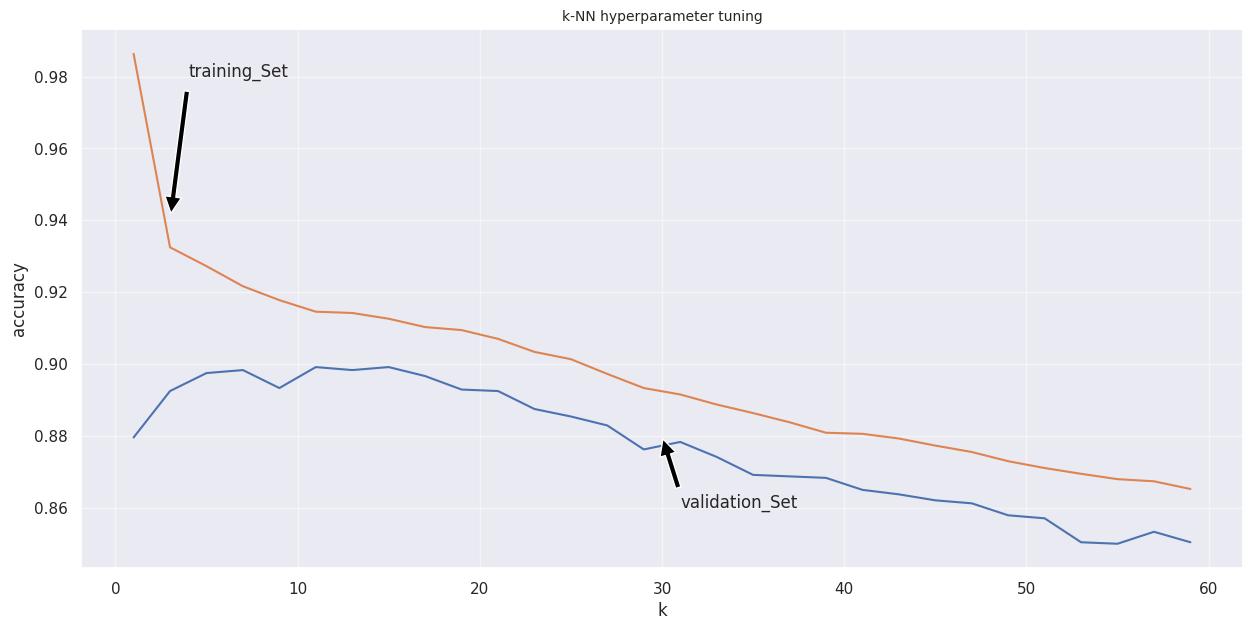

In [ ]:

from sklearn.model_selection import cross_validate
TL = df[["spread"]].copy(deep = True)
y = np.array(TL.values.tolist())
validation = []
train = []
K = []
max = -1
best =-1
for k in range(1,61,2):
  resDic = cross_validate(kNN(k),normalized_df,y,scoring = 'accuracy' , cv = 8,return_train_score = True)#,_,_,_
  validation_score = resDic['test_score']
  validation_score = validation_score.mean()
  train_score = resDic['train_score']
  train_score = train_score.mean()
  validation.append(validation_score)
  train.append(train_score)
  K.append(k)
  if validation_score > max:
      max = validation_score
      best = k
plt.plot(K,validation)
plt.plot(K,train)
plt.grid(alpha= 0.5)
plt.annotate('training_Set', xy=(3,0.94 ), xytext=(4, 0.98),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.annotate('validation_Set', xy=(30,0.88), xytext=(31, 0.86),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.title("k-NN hyperparameter tuning", fontsize=10)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()
#best k is 7~~
#print("k is,k,max::",best,max)'''

<Axes: title={'center': 'spread class confusion_matrix'}>

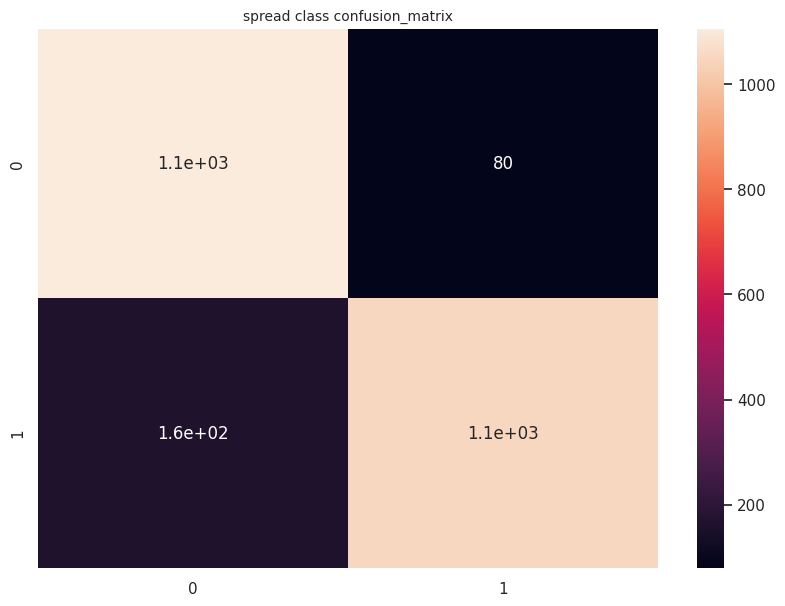

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y = df['spread'].copy().to_numpy()
y_pred = cross_val_predict(kNN(7), normalized_df, y, cv = 8)

conf_mat = confusion_matrix(y, y_pred)

plt.figure(figsize = (10,7))
plt.title("spread class confusion_matrix", fontsize=10)
sns.heatmap(conf_mat, annot=True)


Observing the 10 most correlated features with risk

In [ ]:
s = df.corr().risk.abs()
print("feature          corr cf")
s.sort_values(kind="quicksort", ascending=False).head(12)

feature          corr cf


risk              1.000000
sugar_levels      0.269311
PCR_05            0.174232
weight            0.128818
age               0.103709
sport_activity    0.102557
PCR_07            0.047568
PCR_09            0.029070
PCR_01            0.027831
A+                0.022870
spread            0.022330
PCR_02            0.020892
Name: risk, dtype: float64

#Decision tree visualization and basic analysis

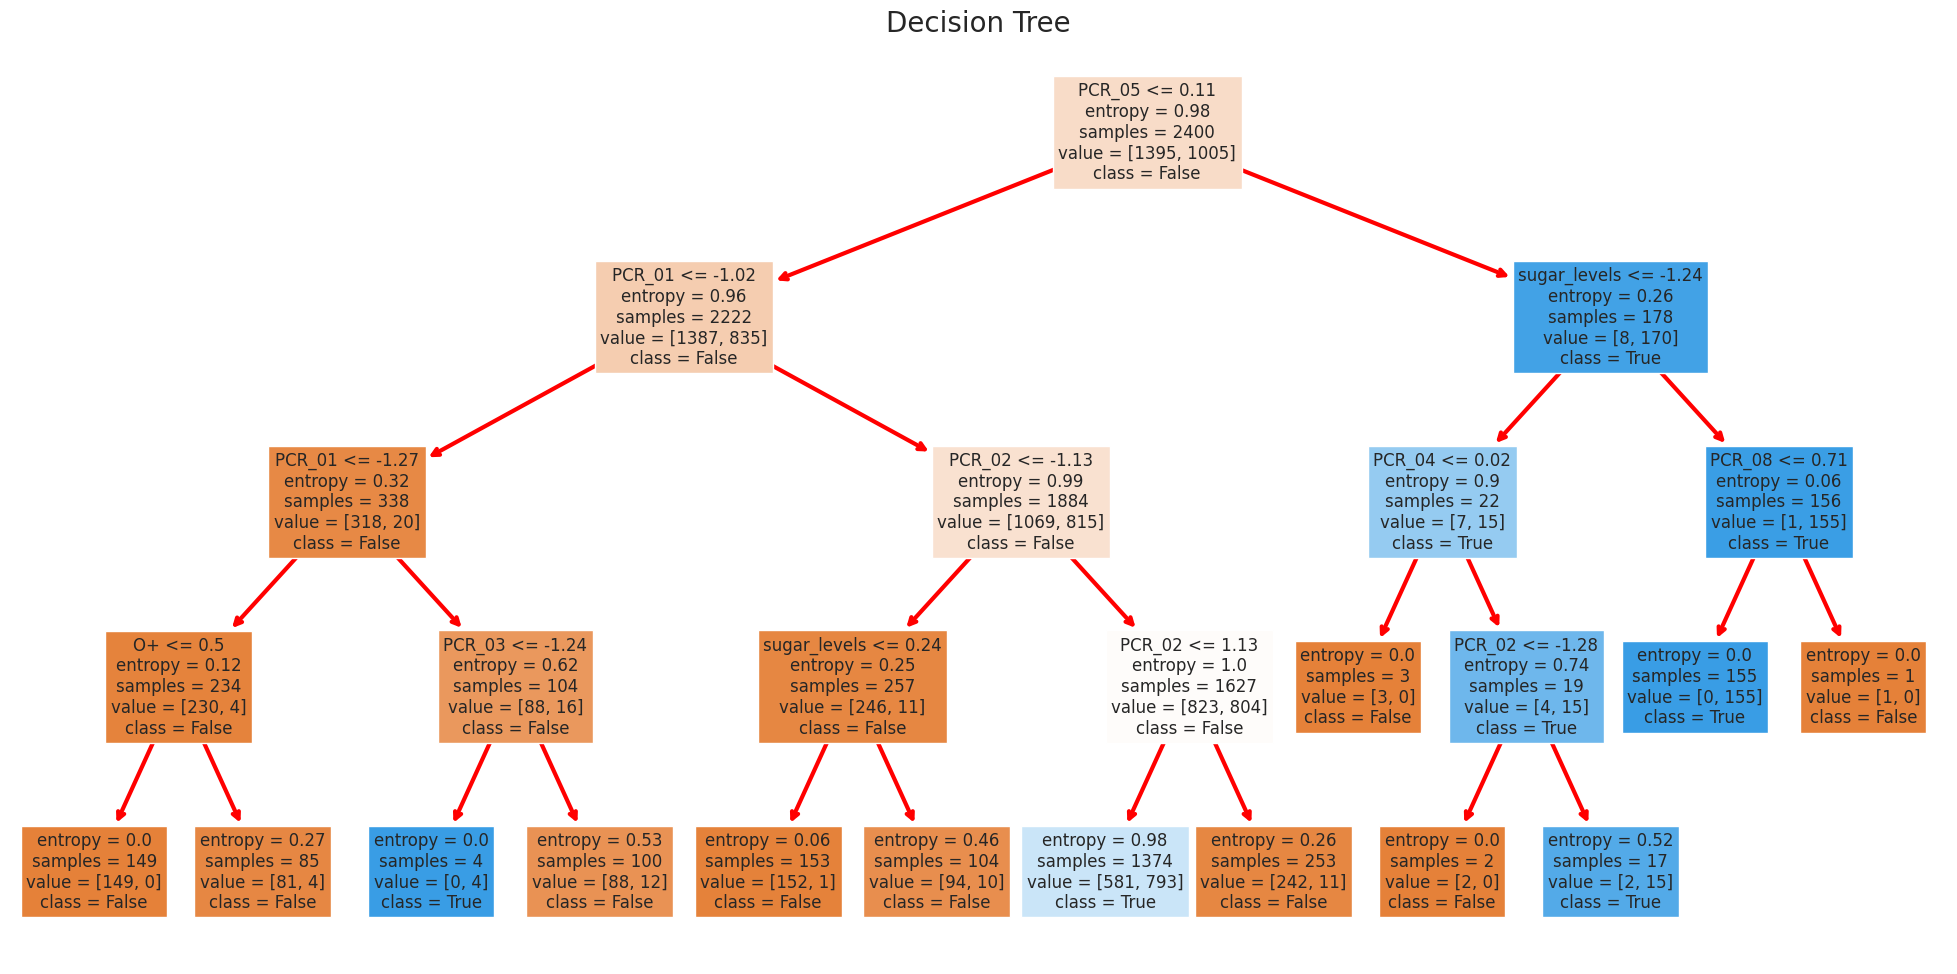

In [ ]:

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

tempdf = df.drop(columns=["risk", "covid", "spread"])

clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(tempdf, df["risk"])

fig, ax = plt.subplots(figsize=(25, 12))
out = tree.plot_tree(clf, ax=ax, fontsize=12, precision=2, filled=True, class_names=['False', 'True'], feature_names=tempdf.columns)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

plt.title("Decision Tree", fontsize=20)
plt.show()


#Decision tree hypertuning

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=13)


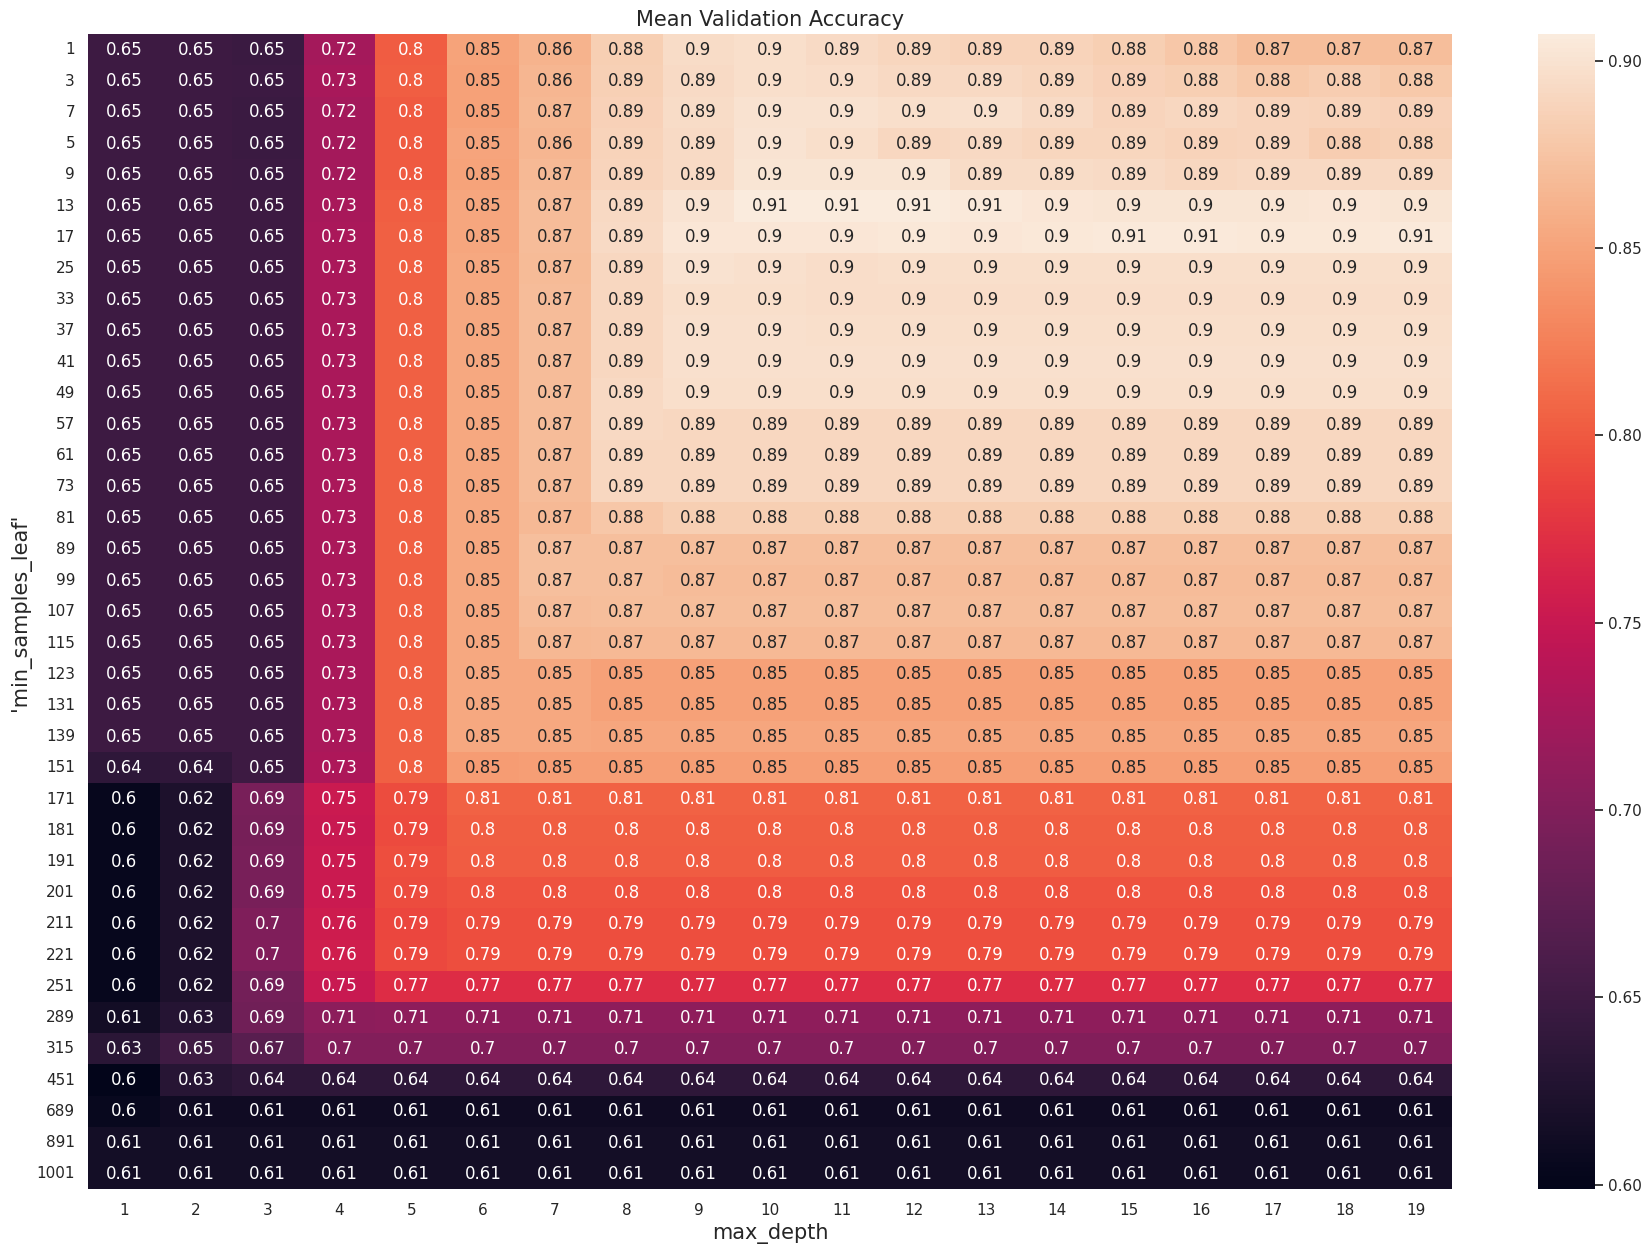

In [ ]:

from sklearn.model_selection import GridSearchCV

leaves = [1, 3, 7, 5, 9, 13, 17, 25, 33, 37, 41, 49, 57, 61, 73, 81, 89, 99, 107, 115, 123, 131, 139, 151, 171, 181, 191, 201, 211, 221, 251, 289, 315, 451, 689, 891, 1001]
max_depth = range(1, 20)
parameters = {'min_samples_leaf': leaves, 'max_depth': max_depth}

TL = df[["risk"]].copy()
y = np.array(TL)
tempdf = df.drop(columns=["risk", "covid", "spread"])

res = GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'), param_grid=parameters, cv=8, refit=True, return_train_score=True)
res.fit(tempdf, y)

print(res.best_estimator_)

lowest_diff = -90
lowest_diff_indices = []

graph = []
for i, leaf in enumerate(leaves):
    new_line = res.cv_results_['mean_test_score'][i::len(leaves)]
    graph.append(new_line)
    diff = np.abs(res.cv_results_['mean_test_score'][i::len(leaves)] - res.cv_results_['mean_train_score'][i::len(leaves)])
    diff_min = np.min(diff)
    if diff_min > lowest_diff:
        lowest_diff = diff_min
        lowest_diff_indices = [i, np.argmin(diff)]

graph = np.array(graph)

fig, ax = plt.subplots(figsize=(22, 15))
sns.heatmap(graph, xticklabels=max_depth, yticklabels=leaves, annot=True, ax=ax)
plt.xlabel("max_depth", fontsize=15)
plt.ylabel("'min_samples_leaf'", fontsize=15)
plt.title("Mean Validation Accuracy", fontsize=15)
plt.show()


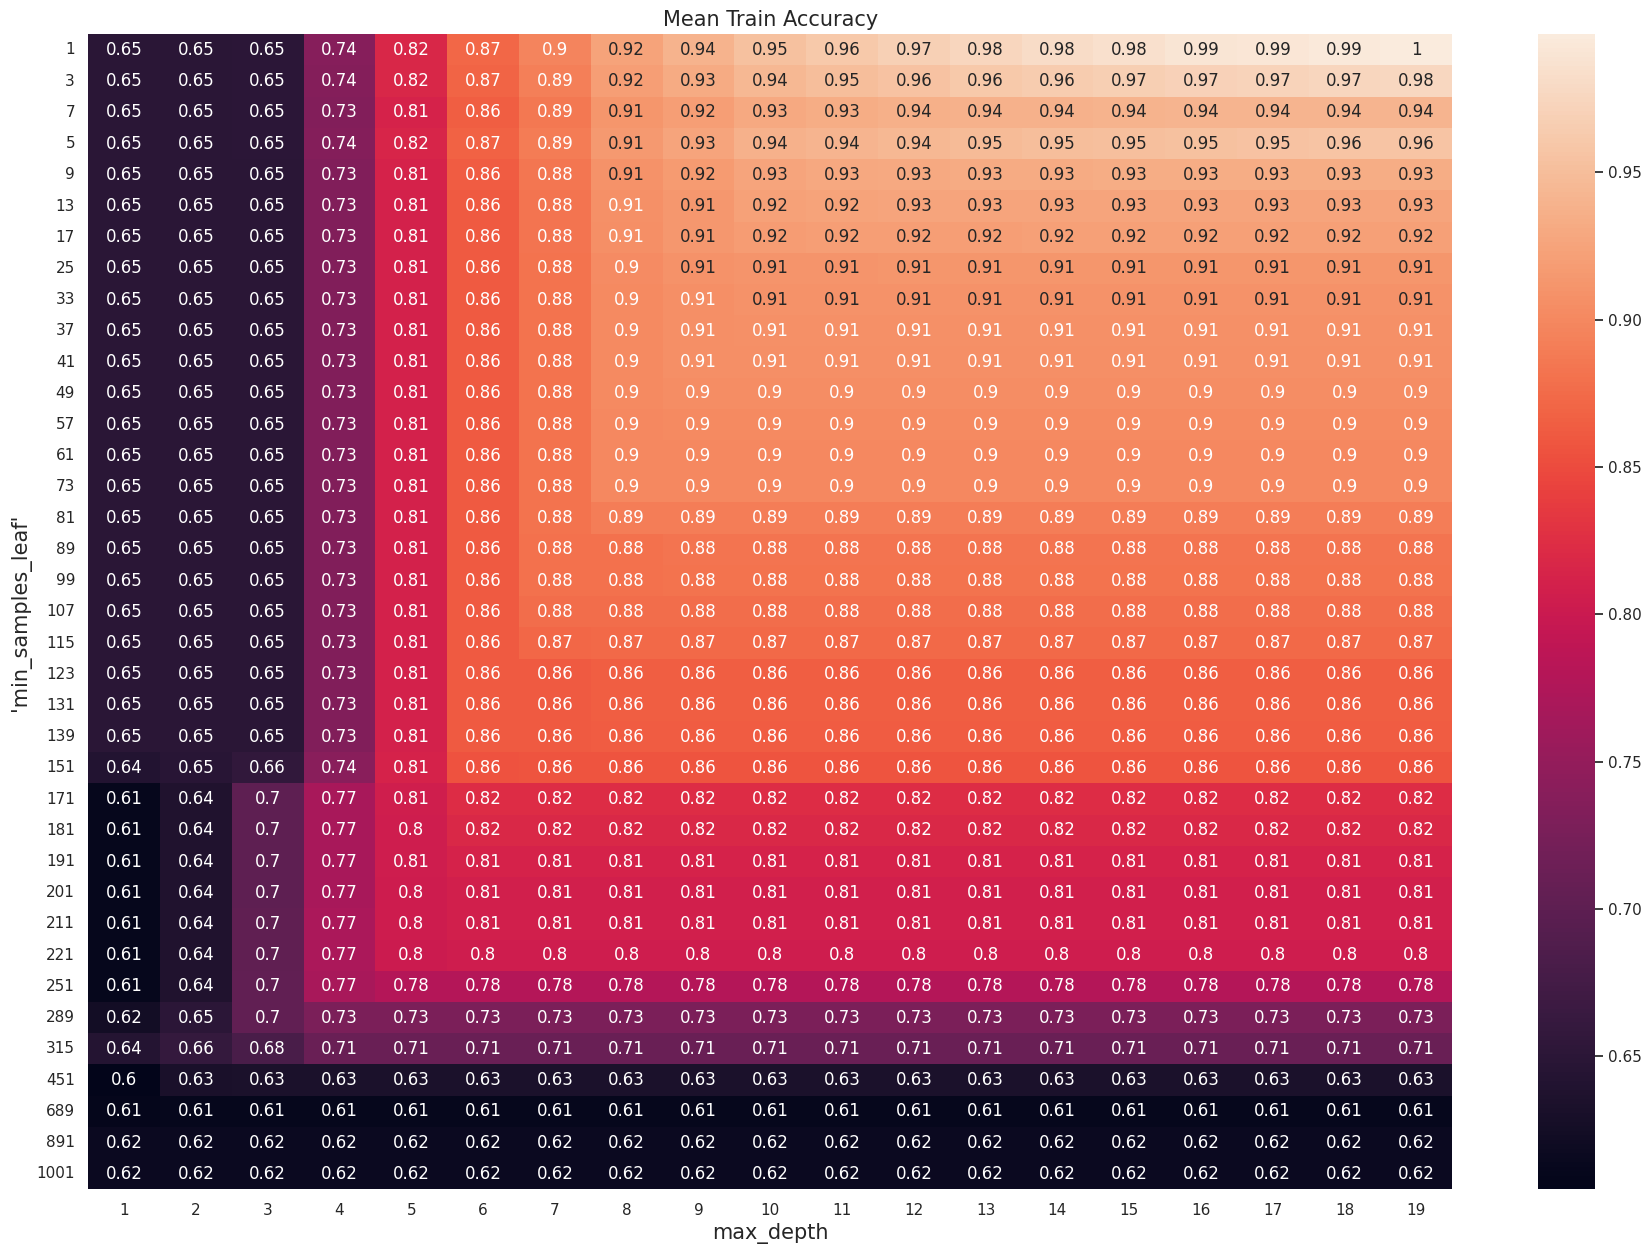

In [ ]:
graph = []
for i in range(len(leaves)):
    l = i
    new_line = []
    while l < len(res.cv_results_['mean_train_score']):
        new_line.append(res.cv_results_['mean_train_score'][l])
        l = l + len(leaves)
    if i != 0:
        graph = np.vstack([graph, new_line])
    else:
        graph = new_line

fig, ax = plt.subplots(figsize=(22, 15))
sns.heatmap(graph, xticklabels=max_depth, yticklabels=leaves, annot=True, ax=ax)
plt.xlabel("max_depth", fontsize=15)
plt.ylabel("'min_samples_leaf'", fontsize=15)
plt.title("Mean Train Accuracy", fontsize=15)
plt.show()


#SVM - implementation and optimization

In [ ]:
#SVM part
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
import math
class SoftSVM(BaseEstimator, ClassifierMixin):
    """
    Custom C-Support Vector Classification.
    """
    def __init__(self, C: float, lr: float = 1e-5):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param C: inverse strength of regularization. Must be strictly positive.
        :param lr: the SGD learning rate (step size)
        """
        self.C = C
        self.lr = lr
        self.batch_size = 32
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.random.randn(n_features)
        self.b = 0.0

    @staticmethod
    #Done
    def loss(w, b: float, C: float, X, y):
        """
        Compute the SVM objective loss.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the Soft SVM objective loss (float scalar)
        """

        y = y.reshape(-1, 1)
        margins = (X.dot(w) + b).reshape(-1, 1)

        hinge_inputs = margins * y

        #new
        hinge_inputs = np.where(1-hinge_inputs < 0,0,hinge_inputs)
        hinge_inputs = np.where(hinge_inputs != 0,1-hinge_inputs,hinge_inputs)

        norm = np.linalg.norm(w)

        # TODO: complete the loss calculation ###new
        loss = C*hinge_inputs.sum() + np.power(norm,2)

        return loss

    @staticmethod
    def subgradient(w, b: float, C: float, X, y):
        """
        Compute the (analytical) SVM objective sub-gradient.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """

        y = y.reshape(-1,1)
        score = (X.dot(w) + b).reshape(-1, 1)

        fOfScore = score * y

        fOfScore = np.where(fOfScore < 1,-1,fOfScore)
        fOfScore = np.where(fOfScore >= 1,0,fOfScore)

        XY = X * y

        finalSum = XY * fOfScore
        g_w = (2*w) + C*(finalSum.sum(axis = 0))
        g_b = C*((fOfScore*y).sum())
        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 2000, keep_losses: bool = True):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets; array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses:
        :return: the training losses and accuracies during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        losses = []
        accuracies = []

        if keep_losses:
            losses.append(self.loss(self.w, self.b, self.C, X, y))
            accuracies.append(self.score(X, y))

        # Iterate over batches
        for iter in range(0, max_iter):
            start_idx = (iter * self.batch_size) % X.shape[0]
            if X.shape[0] <=  start_idx + self.batch_size:
              end_idx =  X.shape[0]
            else:
              end_idx = start_idx + self.batch_size
            #end_idx = min(X.shape[0], start_idx + self.batch_size)

            batch_X = X[start_idx: end_idx]
            batch_y = y[start_idx: end_idx]


            g_w, g_b = self.subgradient(self.w, self.b, self.C, batch_X, batch_y)


            self.w = self.w - (self.lr*g_w)
            self.b = self.b - (self.lr*g_b)

            if keep_losses:
                losses.append(self.loss(self.w, self.b, self.C, X, y))
                accuracies.append(self.score(X, y))

        return losses, accuracies

    def fit(self, X, y, max_iter: int = 2000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets; array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Perform classification on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted class labels for samples in X; array of shape (n_samples,)
        """
        y_pred =  (X.dot(self.w) + self.b).reshape(-1, 1)
        y_pred = np.where(y_pred >= 0,1,y_pred)
        y_pred = np.where(y_pred < 0,-1,y_pred)
        return y_pred


In [ ]:
def numerical_subgradient(w, b, C, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = SoftSVM.loss(w_, b, C, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = SoftSVM.loss(w_, b, C, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (SoftSVM.loss(w_, b + delta, C, X, y) - orig_objective) / delta
    return g_w, g_b


def compare_gradients(X, y, deltas, C=1, REPEATS=100,figsize=(10, 6)):
    residual_means = []

    for delta in deltas:
        residuals = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad = SoftSVM.subgradient(w, b, C, X, y)[0]
            numeric_grad = numerical_subgradient(w, b, C, X, y, delta=delta)[0]

            residual = np.linalg.norm(numeric_grad - analytic_grad)
            residuals.append(residual)

        residual_means.append(np.mean(residuals))
    plt.figure(figsize=figsize)
    plt.title('Residuals of analytical and numerical gradients', fontsize=22)
    plt.plot(deltas, residual_means, linewidth=3)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\delta$', fontsize=18)
    plt.ylabel('dist(analytic, numeric$_\delta$)', fontsize=18)
    plt.ylabel(r'$\left\Vert \nabla_{w}p_{C}\left(w,b\right) - u_{\delta} \left(w,b\right)\right\Vert$', fontsize=18)

    plt.grid(alpha=0.5)
    plt.show()


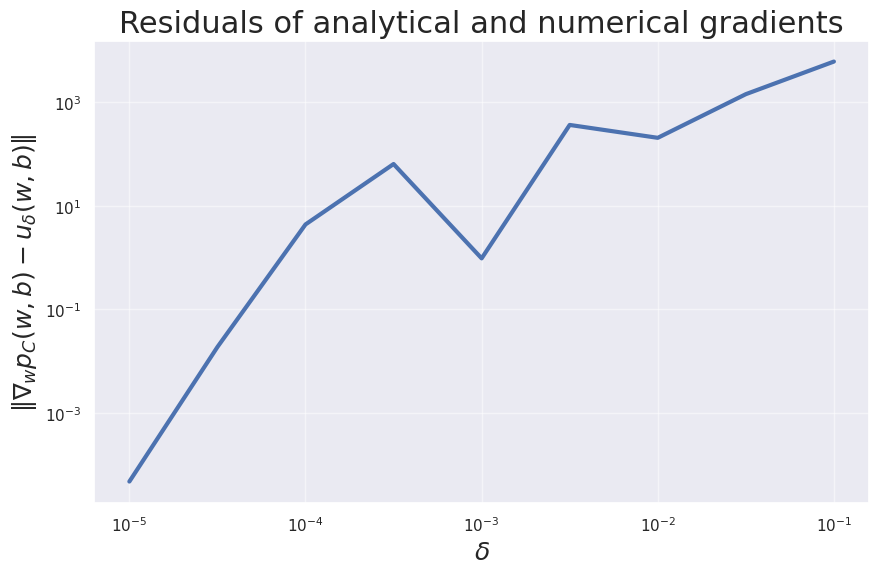

In [ ]:
X_train = df.copy(deep = True)
X_train.drop(columns = ["covid","risk","spread"],inplace = True)
X_train = X_train.to_numpy()
y_train = df['covid'].copy(deep = True).to_numpy()
compare_gradients(X_train, y_train, deltas=np.logspace(-5, -1, 9))

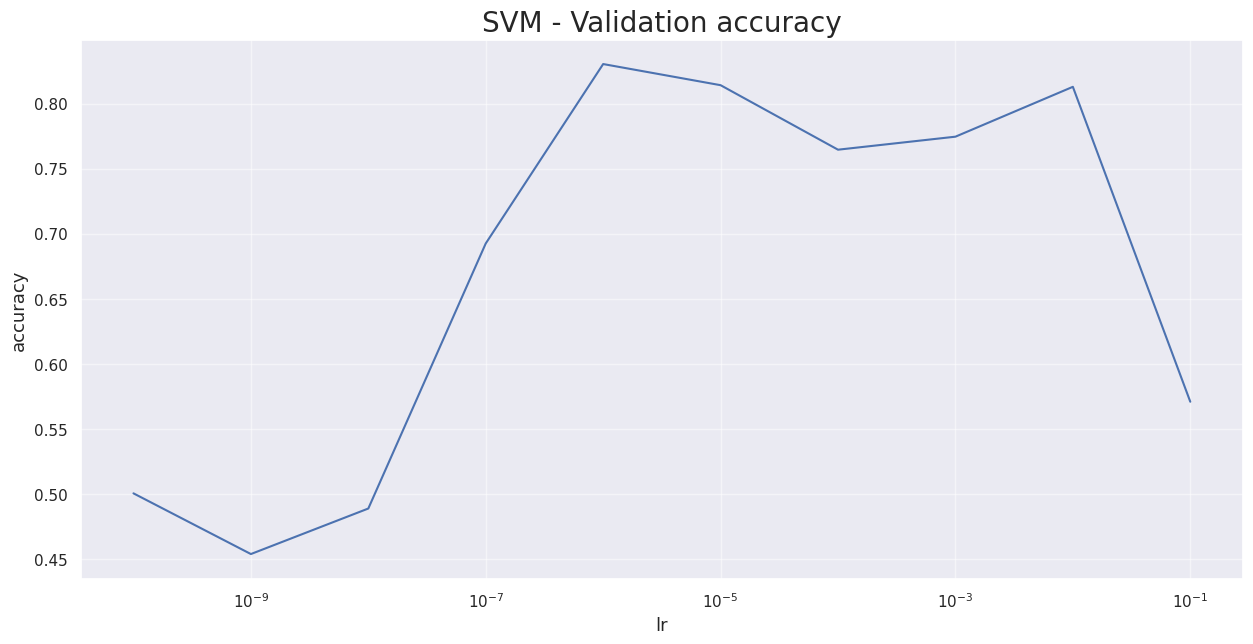

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#changing labels from 0 to -1
df["risk"].replace(np.float64(0),np.float64(-1),inplace = True)
df["spread"].replace(np.float64(0),np.float64(-1),inplace = True)
df["covid"].replace(np.float64(0),np.float64(-1),inplace = True)

tempDf = df[["PCR_03","PCR_07","PCR_10"]].copy(deep = True)
validation = []
K = []
train = []

#tempDf.drop(columns = ["risk","spread","covid"],inplace = True)
for k in np.logspace(-10, -1, 10):
  clk = PolynomialFeatures(2)
  tempData = clk.fit_transform(tempDf)
  resDic = cross_validate(SoftSVM(C =1000,lr = k),tempData,df["spread"].copy(deep = True).to_numpy(),scoring = 'accuracy' , cv = 8,return_train_score = True)#,_,_,_
  validation_score = resDic['test_score']
  validation_score = validation_score.mean()
  train_score = resDic['train_score']
  train_score = train_score.mean()
  validation.append(validation_score)
  train.append(train_score)
  K.append(k)
plt.plot(K,validation)
plt.title("SVM - Validation accuracy", fontsize=20)
plt.xlabel('lr',fontsize = 13)
plt.ylabel('accuracy',fontsize = 13)
plt.grid(alpha= 0.5)
plt.xscale('log')
#plt.figsize(size =(10,5))
plt.rcParams['figure.figsize'] = [15, 7]
plt.show()


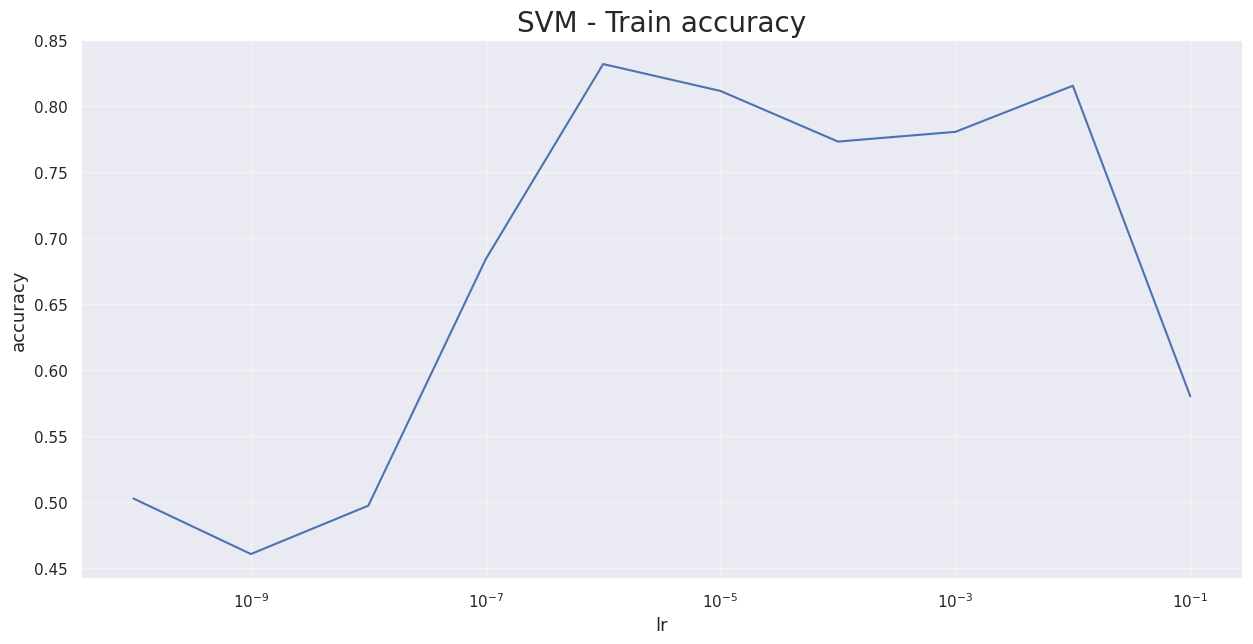

In [ ]:
plt.plot(K,train)
plt.grid(alpha= 0.5)
plt.xlabel('lr',fontsize = 13)
plt.ylabel('accuracy',fontsize = 13)
plt.title("SVM - Train accuracy", fontsize=20)
plt.xscale('log')
plt.show()